In [115]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from scipy.stats import norm
import scipy.stats as stats
import math

pd.set_option('display.height', 2000)
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 2000)
sns.set(font_scale = 1.5)

In [116]:
df = pd.read_csv('listings_cleaned.csv')

In [117]:
df.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_response_rate,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,street,neighbourhood,zipcode,accommodates,bathrooms,bedrooms,beds,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month,review_score_totals,recent_availability,summary_len,space_len,description_len,neighborhood_overview_len,notes_len,transit_len,access_len,interaction_len,house_rules_len,host_about_len,host_verifications_len,amenities_len,calendar_updated_recently,host_location_SF,street_SF,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_f,host_is_superhost_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,is_location_exact_f,is_location_exact_t,requires_license_f,requires_license_t,instant_bookable_f,instant_bookable_t,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t,city_Bay Area,"city_Bernal Heights, San Francisco",city_Brisbane,city_Daly City,city_Noe Valley - San Francisco,city_San Francisco,"city_San Francisco, Hayes Valley","smart_location_Bay Area, CA","smart_location_Bernal Heights, San Francisco, CA","smart_location_Brisbane, CA",smart_location_CA,"smart_location_Daly City, CA","smart_location_Noe Valley - San Francisco, CA","smart_location_San Francisco, CA","smart_location_San Francisco, Hayes Valley, CA","smart_location_US,",property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Condominium,property_type_Cottage,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_In-law,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Timeshare,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,license_has,transit_has,popular,no_pets,no_smoking
0,958,"Bright, Modern Garden Unit - 1BR/1B",Our bright garden unit overlooks a grassy back...,"Newly remodeled, modern, and bright garden uni...",Our bright garden unit overlooks a grassy back...,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,1169,Holly,2008-07-31,"San Francisco, California, United States",92%,Duboce Triangle,1,1,"['email', 'phone', 'facebook', 'reviews', 'kba']","San Francisco, CA, United States",Duboce Triangle,94117.0,3,1.0,1.0,2.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",-1.0,$170.00,"$1,120.00","$4,200.00",$100.00,$100.00,2,$25.00,1,30,5 days ago,3,5,9,122,152,2009-07-23,2018-07-29,97.0,10.0,10.0,10.0,10.0,10.0,10.0,STR-00012

In [118]:
dff = df[['popular', 'id', 'name', 'host_name', 'host_since', 'availability_30', 'availability_60', 'availability_90', 
          'availability_365', 'number_of_reviews', 'accommodates', 'bedrooms', 'reviews_per_month',
         'neighbourhood', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
         'amenities', 'bathrooms', 'beds', 'host_verifications', 'summary_len', 'description_len', 'transit_has',
         'no_smoking', 'no_pets', 'host_response_time_a few days or more', 'host_response_time_within a day',
         'host_response_time_within a few hours', 'host_response_time_within an hour']]

In [119]:
dff['price'] = dff['price'].replace('-1', np.NaN)
#dff['weekly_price'] = dff['weekly_price'].replace('-1', np.NaN)
#dff['monthly_price'] = dff['monthly_price'].replace('-1', np.NaN)
#dff['security_deposit'] = dff['security_deposit'].replace('-1', np.NaN)
#dff['cleaning_fee'] = dff['cleaning_fee'].replace('-1', np.NaN)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [120]:
dff.isna().sum()

popular                                     0
id                                          0
name                                        0
host_name                                   0
host_since                                  0
availability_30                             0
availability_60                             0
availability_90                             0
availability_365                            0
number_of_reviews                           0
accommodates                                0
bedrooms                                    1
reviews_per_month                        1139
neighbourhood                             385
price                                       0
weekly_price                                0
monthly_price                               0
security_deposit                            0
cleaning_fee                                0
amenities                                   0
bathrooms                                  26
beds                              

In [121]:
dff = dff.dropna(axis=0, subset=['bedrooms', 'neighbourhood', 'bathrooms', 'beds'])
dff.head()

,popular,id,name,host_name,host_since,availability_30,availability_60,availability_90,availability_365,number_of_reviews,accommodates,bedrooms,reviews_per_month,neighbourhood,price,weekly_price,monthly_price,security_deposit,cleaning_fee,amenities,bathrooms,beds,host_verifications,summary_len,description_len,transit_has,no_smoking,no_pets,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,True,958,"Bright, Modern Garden Unit - 1BR/1B",Holly,2008-07-31,3,5,9,122,152,3,1.0,1.38,Duboce Triangle,$170.00,"$1,120.00","$4,200.00",$100.00,$100.00,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",1.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",248,1000,1,True,True,0,0,0,1
1,False,5858,Creative Sanctuary,Philip And Tania,2009-03-02,30,60,90,365,112,5,2.0,0.99,Bernal Heights,$235.00,"$1,600.00","$5,500.00",-1,$100.00,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",1.0,3.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",0,1000,1,False,False,0,0,0,1
2,False,7918,A Friendly Room - UCSF/USF - San Francisco,Aaron,2009-06-17,30,60,90,365,17,2,1.0,0.16,Cole Valley,$65.00,$485.00,"$1,685.00",$200.00,$50.00,"{TV,Internet,Wifi,Kitchen,""Free street parking...",4.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",249,1000,1,True,False,0,0,1,0
3,False,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,Aaron,2009-06-17,0,23,53,328,7,2,1.0,0.15,Cole Valley,$65.00,$490.00,"$1,685.00",$200.00,$50.00,"{TV,Internet,Wifi,Kitchen,""Free street parking...",4.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",249,1000,1,True,True,0,0,1,0
4,False,8339,Historic Alamo Square Victorian,Rosy,2009-07-02,25,48,78,78,26,5,2.0,0.24,Alamo Square,$675.00,-1,-1,$0.00,$225.00,"{TV,Internet,Wifi,Kitchen,Heating,""Family/kid ...",1.5,2.0,"['email', 'phone', 'reviews', 'kba']",243,1000,0,False,False,0,0,0,1


In [122]:
dff['popular'] = dff['popular'].apply(lambda x: 1 if x else 0)
dff['no_pets'] = dff['no_pets'].apply(lambda x: 1 if x else 0)
dff['no_smoking'] = dff['no_smoking'].apply(lambda x: 1 if x else 0)

In [123]:
dff['price'] = dff['price'].str.replace(',', '')
dff['price'] = dff['price'].str.replace('$', '')
dff['price'] = dff['price'].astype(float)

In [124]:
features = dff[['availability_30', 'availability_60', 'availability_90', 'availability_365', 'accommodates', 
                'bedrooms', 'neighbourhood', 'price', 'bathrooms', 'beds', 'summary_len', 'description_len', 
                'transit_has', 'no_smoking', 'no_pets', 'host_response_time_a few days or more', 
                'host_response_time_within a day', 'host_response_time_within a few hours', 
                'host_response_time_within an hour']]

neifeatures = dff[['neighbourhood']]

avafeatures = dff[['availability_30', 'availability_60', 'availability_90', 'availability_365']]

accfeatures = dff[['accommodates', 'bedrooms', 'bathrooms', 'beds']]

desfeatures = dff[['summary_len', 'description_len']]

rulfeatures = dff[['transit_has', 'no_smoking', 'no_pets']]

hosfeatures = dff[['host_response_time_a few days or more', 'host_response_time_within a day', 
            'host_response_time_within a few hours', 'host_response_time_within an hour']]

prifeatures = dff[['price']]

target = dff['popular']

In [125]:
features = pd.get_dummies(features, columns=['neighbourhood'])
neifeatures = pd.get_dummies(neifeatures, columns=['neighbourhood'])

In [126]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import train_test_split

In [127]:
X = features.values
y = target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42, stratify=y)

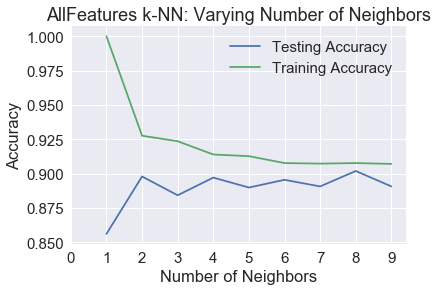

In [128]:
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('AllFeatures k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(range(10))
plt.show()

In [129]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [130]:
print(knn.score(X_test, y_test))

0.90192926045


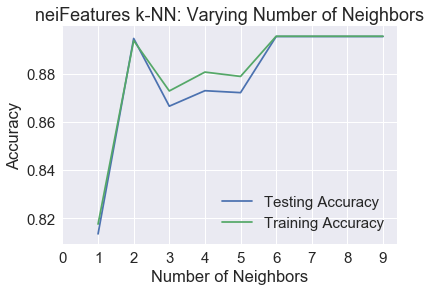

In [131]:
X = neifeatures.values
y = target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42, stratify=y)

neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('neiFeatures k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(range(10))
plt.show()

In [132]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [133]:
print(knn.score(X_test, y_test))

0.894694533762


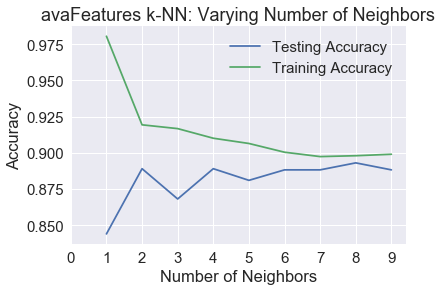

In [134]:
X = avafeatures.values
y = target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42, stratify=y)

neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('avaFeatures k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(range(10))
plt.show()

In [135]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [136]:
print(knn.score(X_test, y_test))

0.89308681672


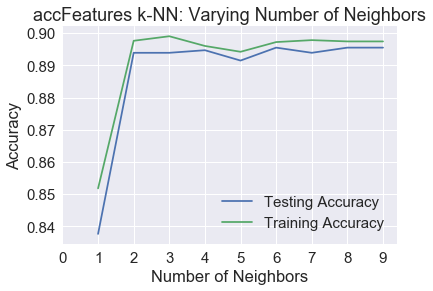

In [137]:
X = accfeatures.values
y = target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42, stratify=y)

neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('accFeatures k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(range(10))
plt.show()

In [138]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [139]:
print(knn.score(X_test, y_test))

0.895498392283


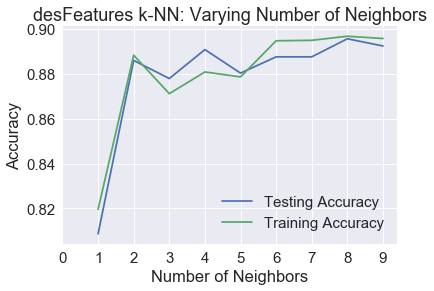

In [140]:
X = desfeatures.values
y = target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42, stratify=y)

neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('desFeatures k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(range(10))
plt.show()

In [141]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [142]:
print(knn.score(X_test, y_test))

0.885852090032


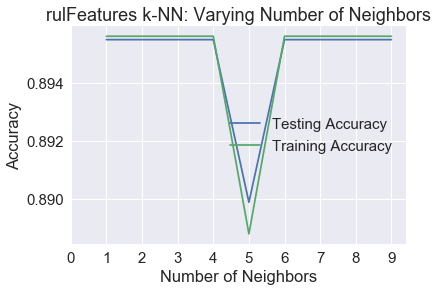

In [143]:
X = rulfeatures.values
y = target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42, stratify=y)

neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('rulFeatures k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(range(10))
plt.show()

In [144]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [145]:
print(knn.score(X_test, y_test))

0.895498392283


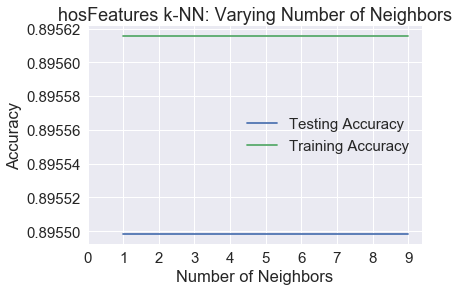

In [146]:
X = hosfeatures.values
y = target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42, stratify=y)

neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('hosFeatures k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(range(10))
plt.show()

In [147]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [148]:
print(knn.score(X_test, y_test))

0.895498392283


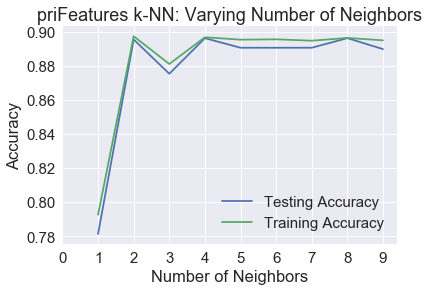

In [149]:
X = prifeatures.values
y = target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42, stratify=y)

neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('priFeatures k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(range(10))
plt.show()

In [150]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [151]:
print(knn.score(X_test, y_test))

0.896302250804


In [152]:
X = features.values
y = target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42, stratify=y)

[  3.00885479e-03  -4.46743303e-03   1.07451859e-03   1.59971473e-04
   6.21279936e-03  -4.27746375e-02  -3.13553168e-05  -1.19513567e-02
  -6.31563211e-04  -1.59111306e-04   9.05251777e-05   3.89521469e-03
   8.93714381e-02   5.04962703e-02   1.23856293e-02   3.72997185e-02
   5.90217933e-02   1.14267939e-01   6.52673436e-03  -6.87437606e-02
   3.86957441e-02   8.49988684e-03  -1.77765544e-02  -9.67001482e-02
  -1.25472277e-01   8.27783089e-03  -5.33512629e-02  -5.40933544e-02
  -1.46121432e-02   1.53300818e-01  -2.50180466e-02  -8.84845862e-02
   3.38959072e-02  -7.28301537e-02  -5.08341562e-02  -5.94138165e-02
   7.69177640e-02   6.23737635e-03   5.00819006e-02   0.00000000e+00
  -4.97814965e-02   3.25481904e-02  -1.20329612e-01   2.87495287e-02
   3.30869571e-04  -2.43818526e-02  -6.17806821e-02  -4.43476847e-03
   3.66874802e-02  -5.24205548e-02  -7.93581666e-03   2.70661113e-02
  -4.47395580e-02   2.59642362e-02  -1.04304646e-03  -3.72917671e-02
   7.14252333e-02   5.73412606e-02

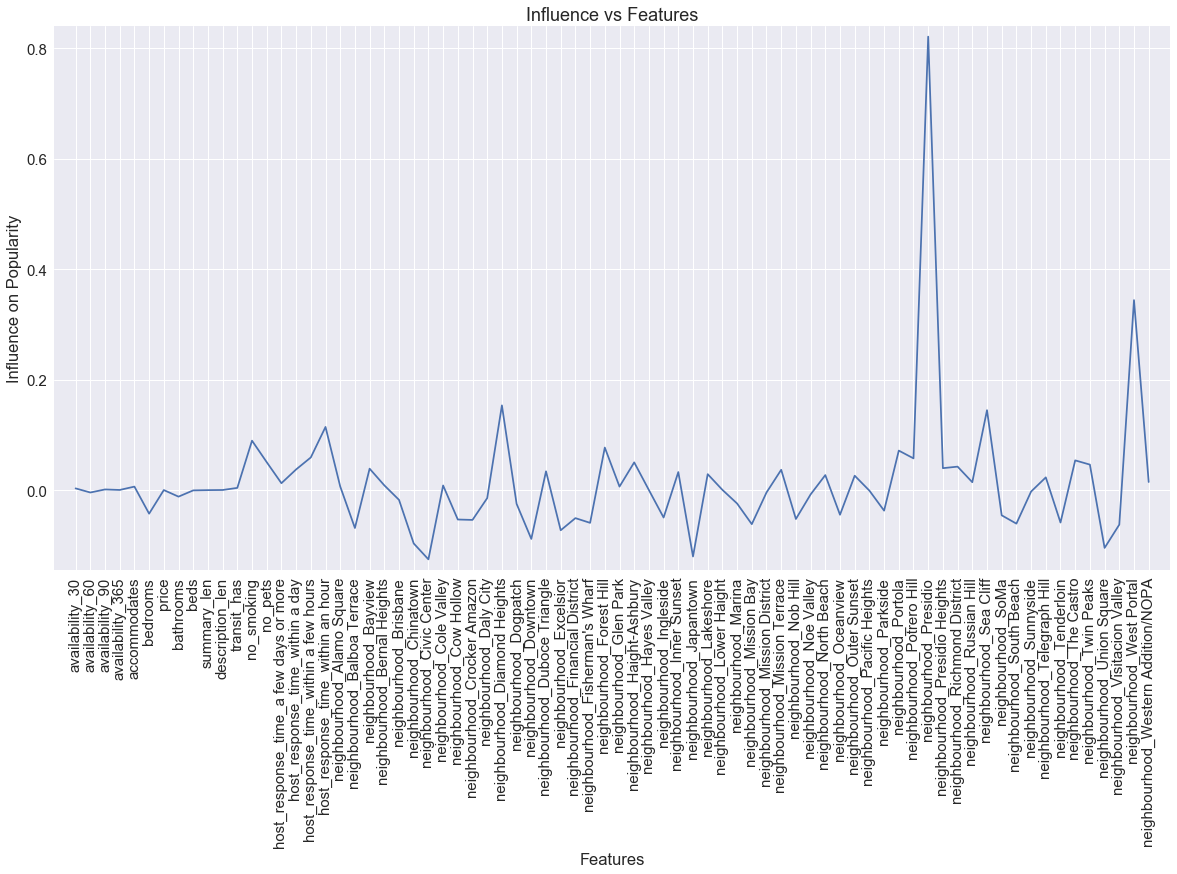

In [165]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.0000001, normalize=True)
lasso.fit(X, y)
lasso_coef = lasso.coef_
print(lasso_coef)

plt.figure(figsize=(20, 10))
plt.plot(range(len(features.columns)), lasso_coef)
plt.ylabel('Influence on Popularity')
plt.xlabel('Features')
plt.title('Influence vs Features')
plt.xticks(range(len(features.columns)), features.columns.values, rotation=90)
plt.margins(0.02)
plt.show()

In [154]:
features.neighbourhood_Presidio.sum()

1

In [160]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X = features.values
y = target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.90192926045
[[1107    7]
 [ 115   15]]
             precision    recall  f1-score   support

          0       0.91      0.99      0.95      1114
          1       0.68      0.12      0.20       130

avg / total       0.88      0.90      0.87      1244



False Positive Rates = [ 0.          0.002693    0.00628366  0.03500898  0.08527828  0.2010772
  0.42010772  1.        ]

True Positive Rates = [ 0.00769231  0.00769231  0.11538462  0.20769231  0.36923077  0.53076923
  0.75384615  1.        ]

Thresholds = [ 0.875  0.75   0.625  0.5    0.375  0.25   0.125  0.   ]

AUC scores computed using 5-fold cross-validation: [ 0.64186922  0.68629678  0.70105743  0.68076923  0.71992729]


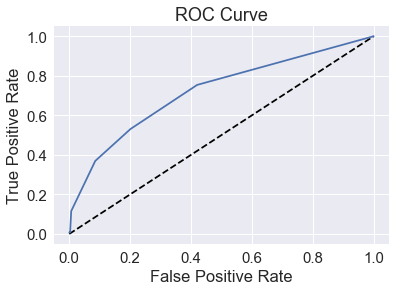

In [161]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

y_pred_prob = knn.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

cv_auc = cross_val_score(knn, X, y, cv=5, scoring='roc_auc')

print("False Positive Rates = {}\n\nTrue Positive Rates = {}\n\nThresholds = {}\n".format(fpr, tpr, thresholds))
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [162]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1,10)}

knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(X, y)

print("Tuned Logistic Regression Parameters: {}".format(knn_cv.best_params_)) 
print("Best score is {}".format(knn_cv.best_score_))


Tuned Logistic Regression Parameters: {'n_neighbors': 6}
Best score is 0.8873873873873874
